First five rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Checking for missing values:
price               0
area           

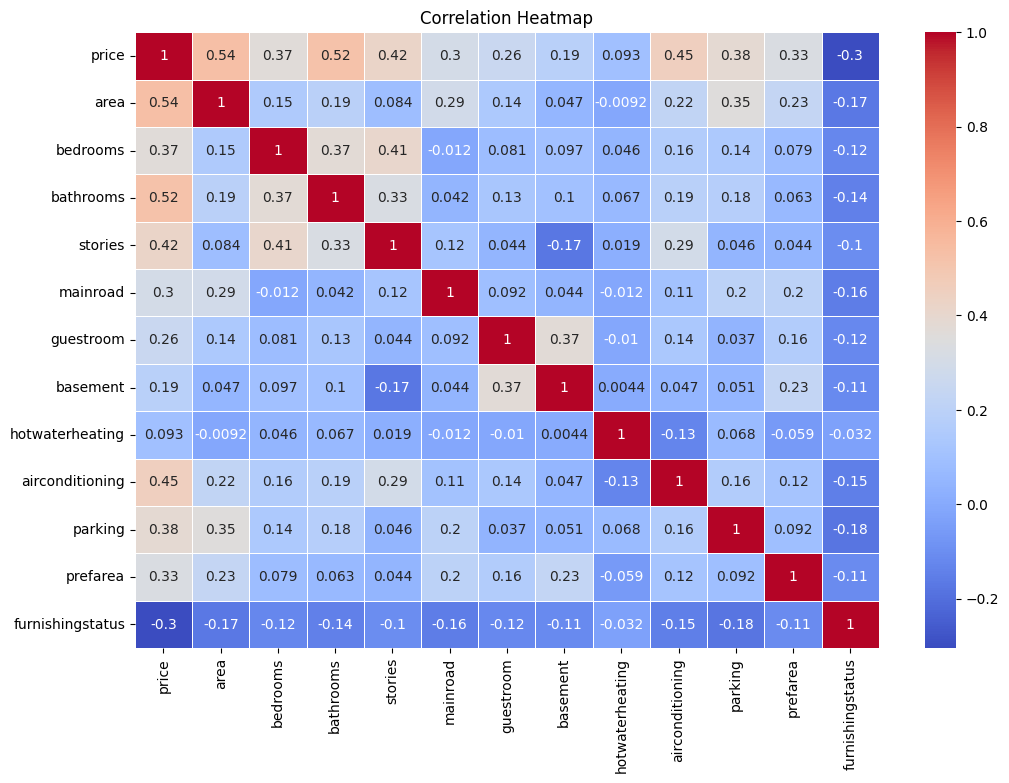

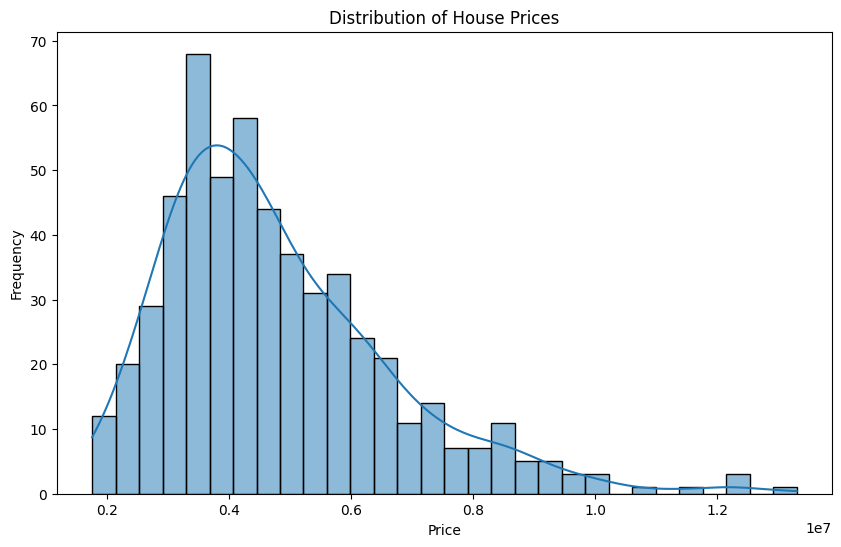

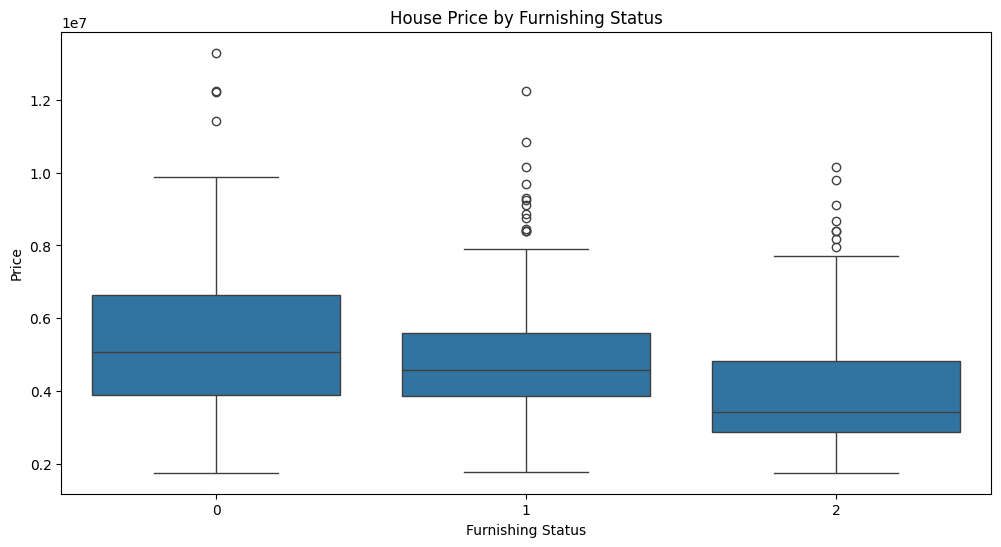

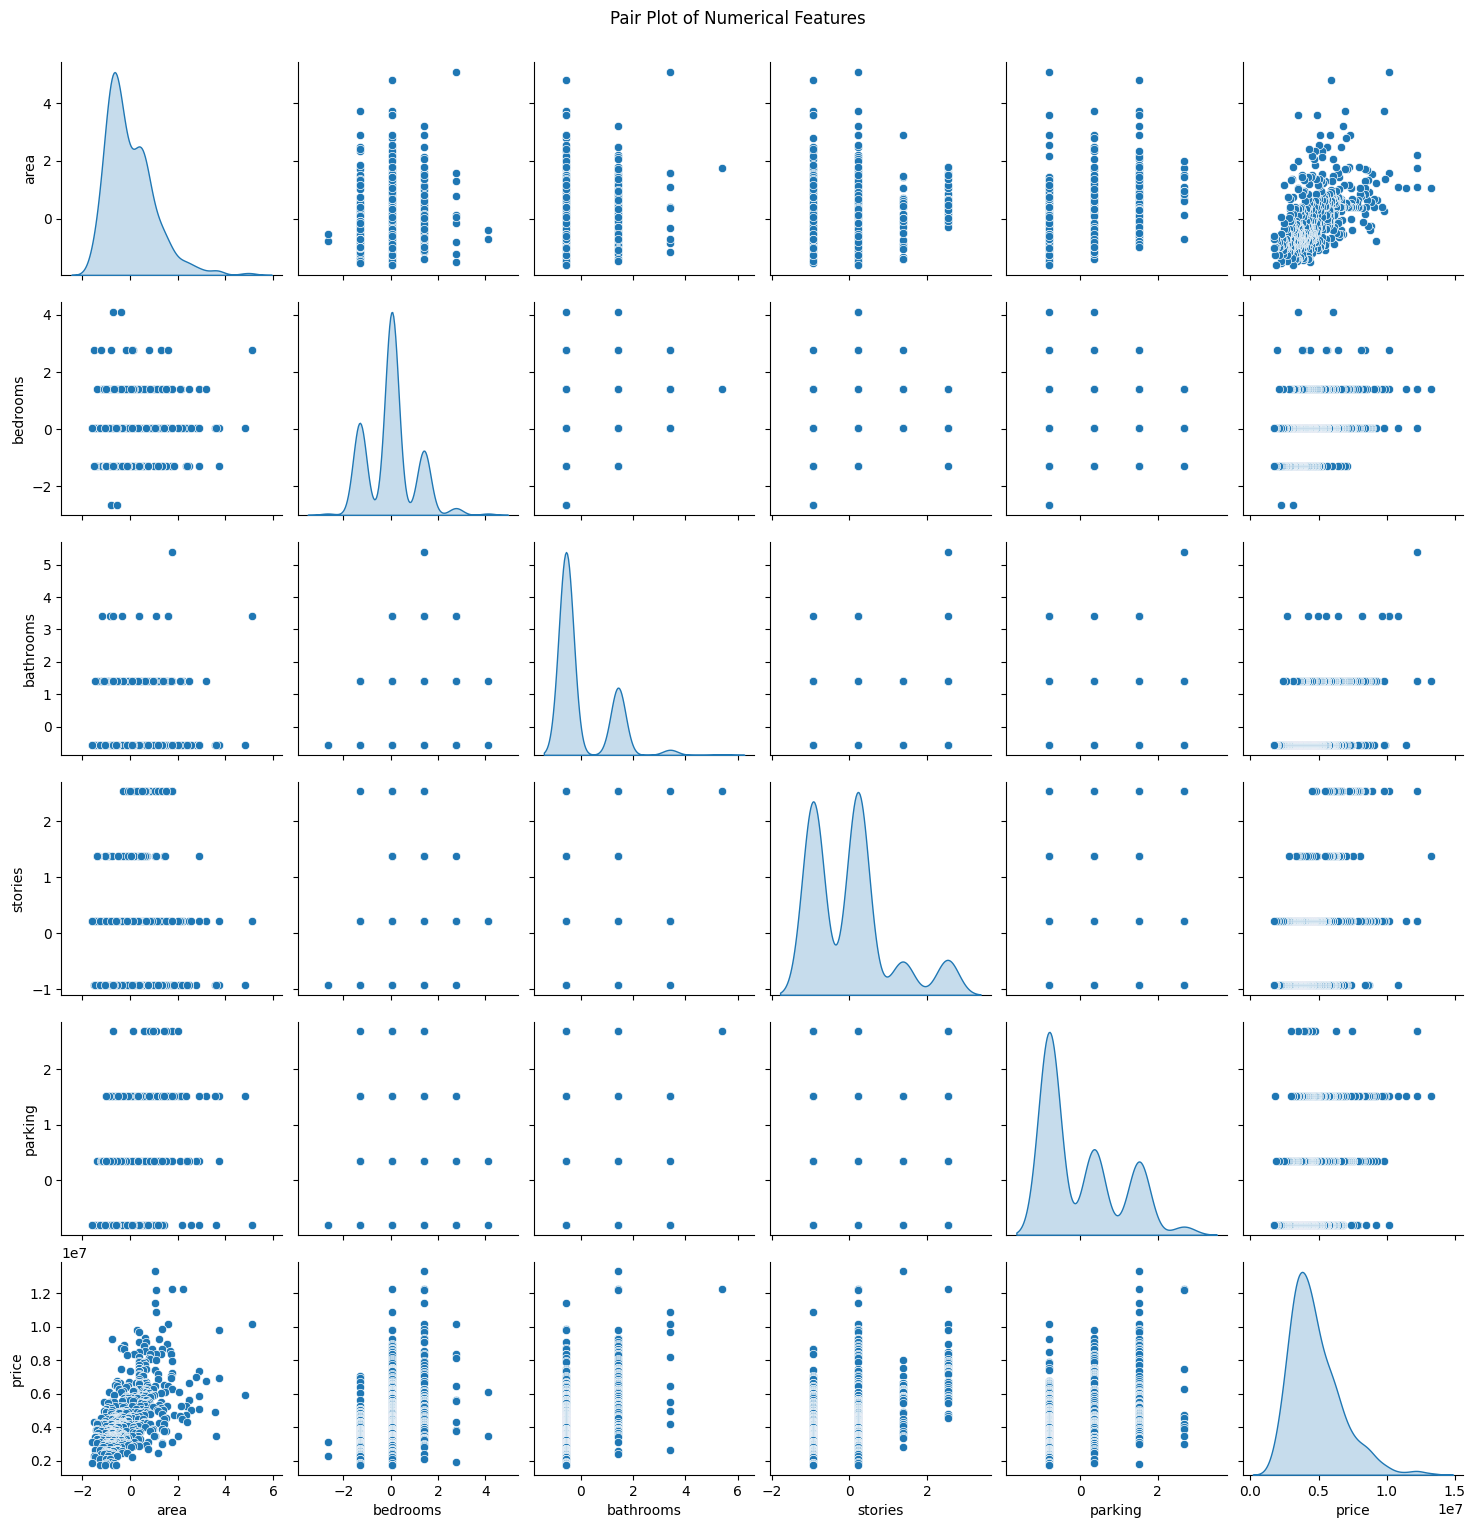


Data after preprocessing:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  1.046726  1.403419   1.421812  1.378217         1          0   
1  12250000  1.757010  1.403419   5.405809  2.532024         1          0   
2  12250000  2.218232  0.047278   1.421812  0.224410         1          0   
3  12215000  1.083624  1.403419   1.421812  0.224410         1          0   
4  11410000  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.517692         1   
1         0                0                1  2.679409         0   
2         1                0                0  1.517692         1   
3         1                0                1  2.679409         1   
4         1                0                1  1.517692         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3      

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/home/user/ajay das/MCA-LAB-S3/Data Science/house price/Housing_Price.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(housing_data.head())

# 1. Checking for missing values
print("\nChecking for missing values:")
print(housing_data.isnull().sum())

# 2. Summary statistics
print("\nSummary statistics:")
print(housing_data.describe())

# 3. Encoding categorical variables
label_enc_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
label_enc = LabelEncoder()

for col in label_enc_cols:
    housing_data[col] = label_enc.fit_transform(housing_data[col])

# 4. Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_data[numerical_cols] = scaler.fit_transform(housing_data[numerical_cols])

# 5. Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 6. Visualizations of relationships
# Distribution plot of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of furnishing status vs. price
plt.figure(figsize=(12, 6))
sns.boxplot(x='furnishingstatus', y='price', data=housing_data)
plt.title('House Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

# Pair plot for numerical features
sns.pairplot(housing_data, vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Checking data after preprocessing
print("\nData after preprocessing:")
print(housing_data.head())


Model Evaluation Metrics:
Mean Absolute Error (MAE): 979679.6912959907
Mean Squared Error (MSE): 1771751116594.0398
Root Mean Squared Error (RMSE): 1331071.4167895124
R-squared (R2): 0.6494754192267794


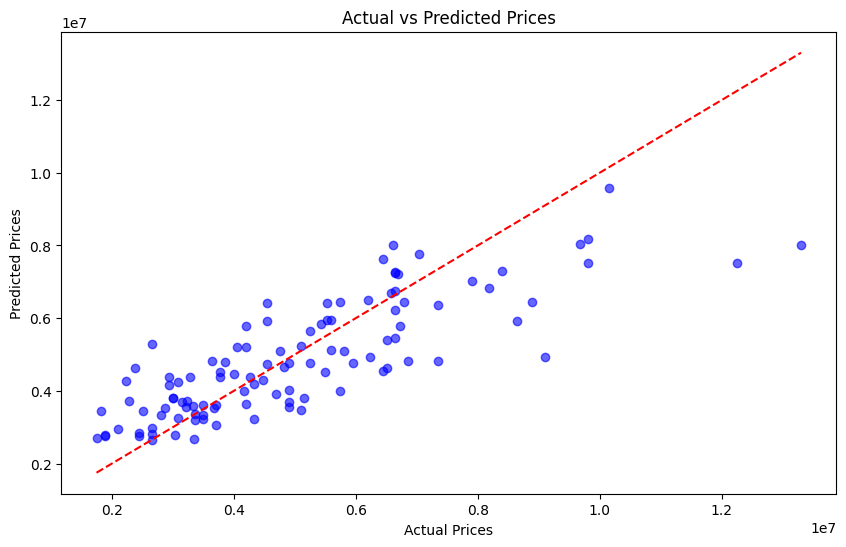

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Splitting the data into features (X) and target (y)
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# 2. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Making predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# 6. Visualizing the Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()
